## Final Project Submission

Please fill out:
* Student name: Gabriel Blatstein
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL: https://gabertooth.github.io/my_first_linear_regression_analysis


In [1]:
import warnings
warnings.filterwarnings('ignore')

The following jupyter notebook walks you through a data set of houses in King County, Washington. The following variables are contained within the data set:
1. id: unique identified for a house
2. Date: house was sold
3. Price: ***Our prediction target variable***
4. Bedrooms: Number of bedrooms in a home
5. Bathrooms: Number of bathrooms in a home
6. Sqft_livingsquare: Sqaure footage of the home
7. Sqft_lotsquare:  Squre footage of the lot the home is built on
8. Floors:  Number of floors (or levels) in the home
9. Waterfront: House which has a view to a waterfront
10. View: Number of times the home has been viewed
11. Condition: The overall condition of the home
12. Grade: Overall grade given to the housing unit, based on King County grading system
13. Sqft_above: Square footage of house without including the basement
14. Sqft_basement: Square footage of the basement
15. Yr_built: Year the house was built in
16. Yr_renovated: Year when house was renovated
17. Zipcode: Zip of the home
18. Lat: Latitude coordinate
19. Long: Longitude coordinate
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


***We will be using the OSEMN Process:***

1. Obtain: Obtain the data from the relevant resources and stakeholders

2. Scrub: Cleaning the data into formats that can be digested in Python packackages such as Sklearn or Statsmodels Rememer the "Gargbage in, garbage out".

3. Explore: Using statistical methods and data analytic techniques explore the data to find significant patterns or trends

4. Model: Construct models to predict and forecast the data. Here we focus on our target variable which is price!

5. Interpret: Take the results of the analysis and model and create meaningful visualizations or presentations

    
    

# Data Obtaining

In [2]:
#Importing all necessary libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling and Vaidation Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm 
import statsmodels.formula.api as smf

First we will start by loading our data and having a quick look at some summary inforrmation

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I noticed a NaN value in waterfront and wanted to take a look at a few of the variables unique values. 

In [6]:
print('Water Front:' , df['waterfront'].unique())
print('View:' , df['view'].unique())
print('Bathrooms:' , df['bathrooms'].unique())
print('Bedrooms:' , df['bedrooms'].unique())
print('Condition:' , df['condition'].unique())
print('Sqft_basement:',df['sqft_basement'].unique())

Water Front: [nan  0.  1.]
View: [ 0. nan  3.  4.  2.  1.]
Bathrooms: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bedrooms: [ 3  2  4  5  1  6  7  8  9 11 10 33]
Condition: [3 5 4 1 2]
Sqft_basement: ['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0

We see there appears to be a question mark in the basement variable or feature. We will deal with this later. 

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Intial Observations:

1. Sqft Basement and Date both need changes to be made to their data types. We will want to make date into a date time data type and Sqft basement into a numerical friendly type like float64

2. In addition we can start to identify some of the categorical variables. For example it looks like waterfront is coded with a 1 or a 0 for whether or not their is a waterfront view.

3. We will have to decide which variables will be categorical vs. numerical. Divide said variables and then perform data cleaning where necessary. 


### Data Cleaning

First, we will check to see if there are any NaN or other weird data integrity issues going on.

In [7]:
df.isna().sum() #We see here that we will have to take a look at the following variables due to have Null or NaN values.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see that there are three variables that have NaN values and need to be delt with. 

In [9]:
sum((df.yr_renovated==0)) #Get a count for how many data points of yr_renovated have a 0

17011

There are 17011 instances of yr_renovated being 0 therefore we will fill this variables NaN's with zeroes

As for view we will assume that setting view equal to 0 for the 63 instances will not weigh significantly on our data later on during modeling. 

As for waterfront, a 0 represents no view of waterfront and 1 represents a view of a waterfront. Therefore we will make the 2,376 records with NaN into zeroes also.

We will replace the three NaN affected variables with zeroes now. 

In [8]:
for i in df:
    df.replace(np.NaN, 0 , inplace=True)

I decided to replace all of the NaN values with the string 'NaN'

In [9]:
df.isna().sum() #cleaned all data, there are no more NaN's

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Categorical Var Cleaning

Here is the start of breaking up our categorical variables and our numerical or quantitative variables. First we will have to decide which cat vars we will use one hot coding or we will manually bin them. 

In [10]:
df_cat=df[['waterfront','condition','view','floors','zipcode','date','grade','yr_built','yr_renovated','bedrooms','bathrooms']]

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null float64
condition       21597 non-null int64
view            21597 non-null float64
floors          21597 non-null float64
zipcode         21597 non-null int64
date            21597 non-null object
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null float64
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [11]:
#Cleaning variables to ensure categorical variables are not taken up as being numerical.
df_cat.loc[:,['waterfront']]= df['waterfront'].astype('category')
df_cat.loc[:,['condition']]= df['condition'].astype("category")
df_cat.loc[:,['view']]= df['view'].astype("category")
df_cat.loc[:,['floors']]= df['floors'].astype("category")
df_cat.loc[:,['zipcode']]= df['zipcode'].astype("category")
df_cat.loc[:,['grade']] = df['grade'].astype('category')
df_cat.loc[:,['yr_built']] = df['yr_built'].astype('category')
df_cat.loc[:,['bedrooms']]= df['bedrooms'].astype('category')
df_cat.loc[:,['bathrooms']]= df['bathrooms'].astype('category')
df_cat.loc[:,['yr_renovated']]=df['yr_renovated'].astype('category')

In [13]:
df_cat.info() #checked to see if we successfully turned all features into category data types. Note: Date will be delt with later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null category
condition       21597 non-null category
view            21597 non-null category
floors          21597 non-null category
zipcode         21597 non-null category
date            21597 non-null object
grade           21597 non-null category
yr_built        21597 non-null category
yr_renovated    21597 non-null category
bedrooms        21597 non-null category
bathrooms       21597 non-null category
dtypes: category(10), object(1)
memory usage: 394.7+ KB


One hot coding will not work for any variables with data that has many unique values because then we would have way too many rows

Therefore, we will code a few of our variables using binning techiniques.

In [14]:
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [15]:
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2015] #Setting up decade bins
year = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2015']
df_cat['yr_built_new']=pd.cut(df_cat['yr_built'], bins= bins, labels=year) #code to cut and create a new column with decade bins

In [16]:
df_cat.head()
#Check to make sure our new binned variable worked. 

,waterfront,condition,view,floors,zipcode,date,grade,yr_built,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,1955,0.0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1951,1991.0,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,1933,0.0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,1965,0.0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,1987,0.0,3,2.00,1980-1990


We will do the same for year renovated! But instead of binning by year we will bin by whether or not the house was ever renovated. 

In [18]:
df_cat=df_cat.drop('yr_built',axis=1)

In [19]:
bins1 = [-1,0,df.yr_renovated.max()] 
year1 = ['0','1'] #0 for whether house was not renovated and then 1 for if the house was renovated
df_cat['yr_renovated']=pd.cut(df_cat['yr_renovated'], bins= bins1, labels=year1)

In [18]:
df_cat.head()

,waterfront,condition,view,floors,zipcode,date,grade,yr_built,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,1955,0.0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1951,1991.0,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,1933,0.0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,1965,0.0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,1987,0.0,3,2.00,1980-1990


In [19]:
dummies=df_cat[['waterfront','condition','view','floors','grade','bedrooms','zipcode','bathrooms','yr_built_new','yr_renovated']]
dummy_cat=pd.get_dummies(dummies,dtype='int64')

In [20]:
dummy_cat.head()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


The last thing that needs to be done is the dat needs to be changed to a date time object.  This can easily be done with the following method, pd.to_datetime()

In [21]:
df_date=pd.to_datetime(df_cat.date)

In [22]:
#Joining the date with the other categorical variables
concat=[dummy_cat,df_date]
df_cat_final= pd.concat(concat, axis=1)
df_cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 222 entries, waterfront_0.0 to date
dtypes: datetime64[ns](1), int64(221)
memory usage: 36.6 MB


### Numerical Data Cleaning

In [23]:
df_num= df[['price','sqft_living','sqft_lot','sqft_basement','sqft_lot15']]

We noticed earlier that we had a question mark in our sqft_basement so we are going to handle that situation now by replacing it with a zero.

Note: some variables are not included here because they were dropped for multicollinearity.

In [25]:
df_num['sqft_basement'].replace(to_replace='?', value= 0, inplace=True)
# df[df['sqft_basement']=='?']= '0'
df_num.loc[:,['sqft_basement']]=df_num['sqft_basement'].astype('float64')


In [26]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


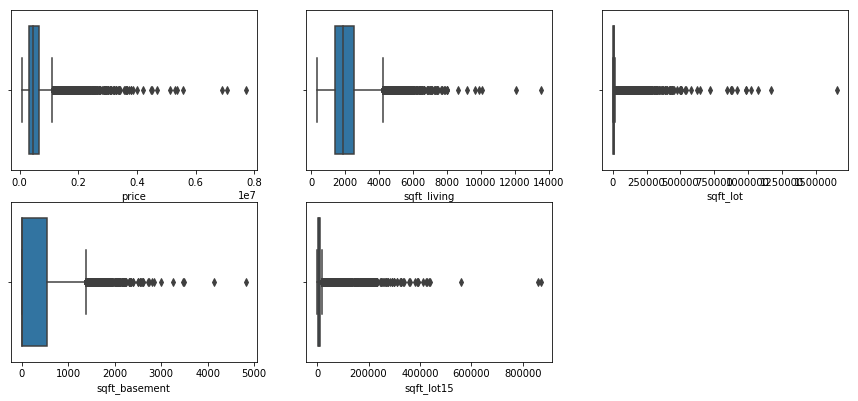

In [27]:
#Now we want to look for outliers in our numerical data

plt.figure(figsize=(15,10))
plt.subplot(331)
sns.boxplot(df_num['price'])
plt.subplot(332)
sns.boxplot(df_num['sqft_living'])
plt.subplot(333)
sns.boxplot(df_num['sqft_lot'])
plt.subplot(334)
sns.boxplot(df_num['sqft_basement'])
plt.subplot(335)
sns.boxplot(df_num['sqft_lot15'])




Here we are going to take out outliers we saw in our data and from analysis done prior.

In [28]:
df_num_final=df_num.loc[df_num['price']<=1500000,:] #Cleaning outliers for all numerical data
df_num_final=df_num.loc[df_num['sqft_living']<= 5000,:]
df_num_final=df_num.loc[df_num['sqft_lot']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_lot15']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_basement']<= 1800,:]


In [29]:
#Double Check variables got changed
df_num.info()
#We see that we now only have 20334 data points for each variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


In [30]:
#seperating out the target variable
targ_var=df_num['price']

df_num_final=df_num.drop('price',axis=1)

We are not going to look at the distros of all of the numerical data feautures.

Text(0.5, 1.0, 'Sqft Basement Distribution')

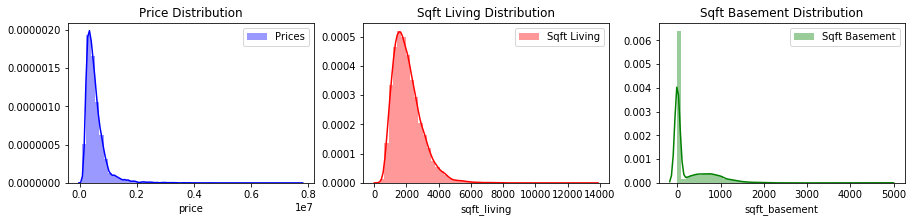

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(targ_var, label='Prices',color='blue')
plt.title('Price Distribution')
plt.legend()
plt.subplot(332)
sns.distplot(df_num.sqft_living, label='Sqft Living',color='red')
plt.title('Sqft Living Distribution')
plt.legend()
plt.subplot(333)
sns.distplot(df_num.sqft_basement, label='Sqft Basement', color='green')
plt.legend()
plt.title('Sqft Basement Distribution')


Text(0.5, 1.0, 'Sqft Lot15 Distribution')

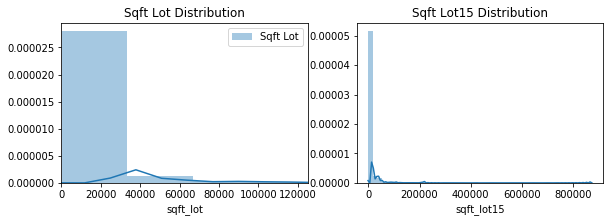

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(334)
sns.distplot(df_num.sqft_lot, label='Sqft Lot')
plt.title('Sqft Lot Distribution')
plt.xlim(0,125000)
plt.legend()
plt.subplot(335)
sns.distplot(df_num.sqft_lot15, label='Sqft Lot15')
plt.title('Sqft Lot15 Distribution')




Sqft Lot and Sqft Lot15 desperately need a log transformation.  We also are going to log transform sqft living to rid these variables of skewness.

In [33]:
df_num_final.sqft_living = np.log(df_num_final.sqft_living)
df_num_final.sqft_lot = np.log(df_num_final.sqft_lot)
df_num_final.head() #performed oeprations and now check to make sure it was done correctly

,sqft_living,sqft_lot,sqft_basement,sqft_lot15
0,7.073270,8.639411,0.0,5650
1,7.851661,8.887653,400.0,7639
2,6.646391,9.210340,0.0,8062
3,7.580700,8.517193,910.0,5000
4,7.426549,8.997147,0.0,7503


In [34]:
df_num_final['sqft_living'] = ( df_num_final.sqft_living - min(df_num_final.sqft_living) ) / ( max(df_num_final.sqft_living) - min(df_num_final.sqft_living) )
df_num_final['sqft_lot'] = ( df_num_final.sqft_lot - min(df_num_final.sqft_lot) ) / ( max(df_num_final.sqft_lot) - min(df_num_final.sqft_lot) )
#min-max scaling is done on the two variables above.

Joining our categorical and numerical together into one final DataFrame.

In [35]:
df_final= df_cat_final.join(df_num_final,how='inner')
df_final.describe()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0,sqft_living,sqft_lot,sqft_basement,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.993240,0.006760,0.001343,0.007871,0.649164,0.262861,0.078761,0.902209,0.015280,0.044312,...,0.000695,0.000417,0.000370,0.001435,0.003380,0.000648,0.454795,0.339313,285.716581,12758.283512
std,0.081944,0.081944,0.036620,0.088373,0.477243,0.440198,0.269372,0.297039,0.122667,0.205792,...,0.026346,0.020410,0.019243,0.037860,0.058042,0.025453,0.117834,0.111875,439.819830,27274.441950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,651.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375546,0.281688,0.000000,5100.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.455945,0.332922,0.000000,7620.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.536222,0.374881,550.000000,10083.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4820.000000,871200.000000


### Multicollinearity

Next, we are going to check for multicollinearity amognst all of the variables. This is a crucial step to reducing noise for modeling purposes.

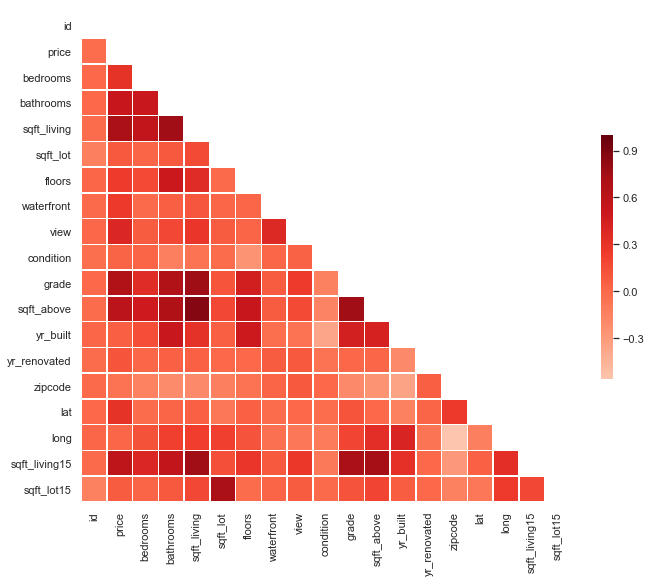

In [37]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.Reds,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We are going to drop sqft_living15 and sqft_above due to multicollinearity. In addition, through research and best practices, I believe zipcode will do just fine for location based statistics.  Therefore we are going to drop latitude and longitude. 

In [38]:
# df_final=df_final.drop(['sqft_living15','sqft_above','lat','long'],axis=1)


We dropped the variables in a iterative process, so we commented the drop code because it is not needed anymore. 

## EDA

The following questions will be answered below with a meaningful explanation for each:

    1. What zipcode has the most expensive houses? Also which area is the cheapest?
    2. What day of the week do most houses sell?
    3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
    4. What sort of affect does a waterfront view have on the price of the house?

#### Question 1: What zipcode has the most expensive houses? Which has the cheapest?

In [38]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [41]:
df_zipcode= df.groupby('zipcode')['price'].mean()
#Grouping our data on zipcode and then adding a column for average price of each zipcode

In [42]:
zip_max=df_zipcode.sort_values(ascending=False)
zip_max.astype('int64')

zipcode
98039    2161300
98004    1356523
98040    1194873
98112    1096239
98102     899607
98109     880077
98105     863228
98006     859938
98119     849714
98005     810289
98033     803990
98199     792187
98075     790734
98074     685675
98077     682885
98053     677215
98177     676419
98008     645628
98052     645244
98122     634558
98115     619944
98116     618695
98007     617254
98027     617053
98029     612642
98144     594706
98024     586120
98103     585048
98107     579109
98117     576834
          ...   
98014     455617
98045     440232
98019     424815
98126     424734
98155     423736
98010     423665
98056     420895
98118     418019
98133     387011
98038     367091
98146     359496
98108     355678
98058     353619
98092     334921
98106     319581
98022     316742
98042     311580
98178     310612
98055     304262
98198     302896
98031     300340
98030     296187
98003     294111
98188     289078
98023     286742
98148     284908
98001     281194
98032 

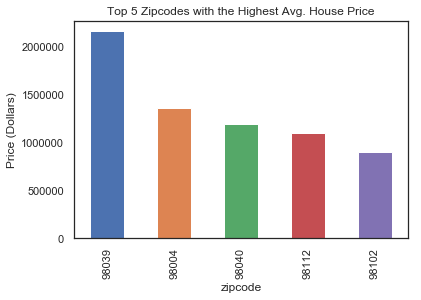

In [43]:
zip_max[0:5].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Highest Avg. House Price')
plt.ylabel('Price (Dollars)')
plt.savefig("TopFive.png") #Visualization to show the Top 5 zipcodes with the most expensive houses

In [44]:
zip_max.astype('int64').head() #Ignore this, just was used for non techinical presentation details.

zipcode
98039    2161300
98004    1356523
98040    1194873
98112    1096239
98102     899607
Name: price, dtype: int64

Text(0, 0.5, 'Price (Dollars)')

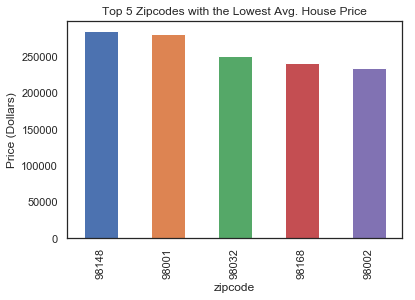

In [45]:
zip_max[-5:].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Lowest Avg. House Price')
plt.ylabel('Price (Dollars)') #Visualization to show the Top 5 Zipcodes with the cheapeast houses

So we concluded that there is a big difference between the most expensive neighborhoods and the cheapest neighborhoods. The difference is roughly $1.9 million; note the average house in King County goes for 364K.

#### Question 2: What day do most houses sell on?

In [46]:
date=pd.to_datetime(df.date)

In [47]:
day_of_week= date.dt.day_name()

In [48]:
graph_day=day_of_week.groupby(day_of_week).count()

In [49]:
dict_day=graph_day
dict_day

date
Friday       3684
Monday       4097
Saturday      287
Sunday        230
Thursday     3989
Tuesday      4710
Wednesday    4600
Name: date, dtype: int64

In [51]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] 
count=[4097,4710,4600,3989,3684,287,230] #Creating two lists to make plotting easier.

Text(0, 0.5, 'Day of Week')

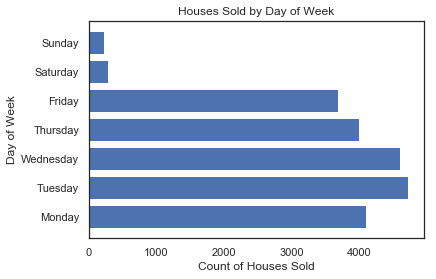

In [52]:
fig, ax = plt.subplots()
plt.barh(days,count)
plt.title('Houses Sold by Day of Week')
plt.xlabel('Count of Houses Sold')
plt.ylabel('Day of Week')

We see here the weekend (Saturday and Sunday) are least likely have a house sold. With Tuesday (4710) and Wednesday (4600) coming in first and second respectively. The observation I would make here, is most people look at houses on the weekend. Then, during the week the house is closed or settled on. 

#### 3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
   

In [51]:
year= pd.to_datetime(df.date)
year_sold=year.dt.year
graph_year=year_sold.groupby(year_sold).count()
graph_year

df.date.unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

It appears the data only has dates 2014 and 2015 where houses were sold. Thus our question can not be answered. Although it would have been a great EDA due to the time period and intrancancies with the financial crisis of '09.

####  4. What sort of affect does a waterfront view have on the price of the house?

Text(0, 0.5, 'Price')

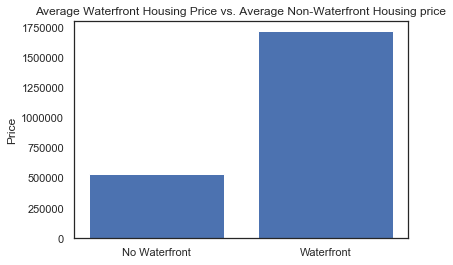

In [53]:
df_price_waterfront = df[['waterfront','price']] #Creating a dataframe with just waterfront and price

plt.bar(['No Waterfront','Waterfront'],df_price_waterfront.groupby('waterfront')['price'].mean()) 
plt.title('Average Waterfront Housing Price vs. Average Non-Waterfront Housing price')
plt.ylabel('Price') #Grouping on waterfront(X-axis) with average price(Y axis ) to form a nice bar chart.

In [53]:
statistic_waterfront=df_price_waterfront.groupby('waterfront')['price'].mean()
print('On average, having a waterfront property increases property value by ', round((statistic_waterfront[1]-statistic_waterfront[0])/(statistic_waterfront[0])*100,2),'%')

On average, having a waterfront property increases property value by  222.61 %


As we can see, the percent change between a waterfront property and a property without a water front property is substantial. You see around a 222% jump in average price when the property has a waterfront.

# Modeling Data

We will be using a simple statsmodels method of LinearRegression() to get the line of best fit for our data. We also will be using sklearn LinearRegression() method to double check our analysis and to provide further details. When we do this we hope to get a value of .75 or above.  Technically, we would like something close to .9 which would show a strong correlation between our features and price. 

In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
X = df_final.drop('date',axis=1)
y = targ_var

#### Sklearn Linear Regression

In [57]:
linreg = LinearRegression() #Linear Regression using Sklearn functionalities
linreg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
linreg.score(X,y)

0.8378148318962712

#### Stats Models Linear Regression

In [59]:
X = df_final.drop('date',axis=1)
y = targ_var

In [60]:
X_int = sm.add_constant(X) #Linear Regression using Stats Models regression
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     511.3
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:57:25   Log-Likelihood:            -2.8775e+05
No. Observations:               21597   AIC:                         5.759e+05
Df Residuals:                   21380   BIC:                         5.777e+05
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.787e+05   1.62e+04     29.489      0.000    4.47e+05    5.11e+05
waterfront_0.0         -6.381e+04   1.02e+04     -6.243      0.000   -8.38e+04   -4.38e+04
waterfront_1.0          5.425e+05   1.22e+04     44.579      0.000    5.19e+05    5.66e+05
condition_1            -1.383e+04   2.32e+04     -0.597      0.550   -5.92e+04    3.16e+04
condition_2             8.807e+04   1.12e+04      7.870      0.000    6.61e+04     1.1e+05
condition_3             9.949e+04   6657.268     14.945      0.000    8.64e+04    1.13e+05
condition_4             1.275e+05   6717.940     18.977      0.000    1.14e+05    1.41e+05
condition_5             1.775e+05   7143.747     24.848      0.000    1.64e+05    1.92e+05
view_0.0               -3.049e+04   4821.192     -6.325      0.000   -3.99e+04    -2.1e+04
view_1.0                6.657e+04   8053.392      8.266      0.000    5.08e+04    8.24e+04
view_2.0                4.653e+04   5947.703      7.824      0.000    3.49e+04    5.82e+04
view_3.0                1.294e+05   6951.201     18.612      0.000    1.16e+05    1.43e+05
view_4.0                2.667e+05   8971.983     29.730      0.000    2.49e+05    2.84e+05
floors_1.0              6.445e+04   9910.018      6.504      0.000     4.5e+04    8.39e+04
floors_1.5              5.321e+04   1.02e+04      5.226      0.000    3.33e+04    7.32e+04
floors_2.0              5.849e+04   9643.156      6.066      0.000    3.96e+04    7.74e+04
floors_2.5              1.423e+05   1.38e+04     10.328      0.000    1.15e+05    1.69e+05
floors_3.0              1.619e+04    1.1e+04      1.474      0.141   -5338.626    3.77e+04
floors_3.5               1.44e+05   4.81e+04      2.995      0.003    4.98e+04    2.38e+05
grade_3                -1.103e+05   1.37e+05     -0.802      0.422    -3.8e+05    1.59e+05
grade_4                -2.432e+05   3.09e+04     -7.874      0.000   -3.04e+05   -1.83e+05
grade_5                -3.172e+05   1.71e+04    -18.541      0.000   -3.51e+05   -2.84e+05
grade_6                -3.232e+05    1.5e+04    -21.599      0.000   -3.52e+05   -2.94e+05
grade_7                -3.121e+05   1.47e+04    -21.297      0.000   -3.41e+05   -2.83e+05
grade_8                -2.743e+05   1.47e+04    -18.670      0.000   -3.03e+05   -2.45e+05
grade_9                -1.764e+05   1.49e+04    -11.839      0.000   -2.06e+05   -1.47e+05
grade_10               -3.106e+04   1.53e+04     -2.026      0.043   -6.11e+04   -1008.370
grade_11                 1.99e+05   1.65e+04     12.075      0.000    1.67e+05    2.31e+05
grade_12                6.235e+05   2.14e+04     29.127      0.000    5.82e+05    6.65e+05
grade_13                1.444e+06   4.52e+04     31.970      0.000    1.36e+06    1.53e+06
bedrooms_1              1.258e+05   2.27e+04      5.543      0.000    8.13e+04  

We see here that we get roughly a .83 r-sqaured value. This is great, but I have a feeling we can make it better. I noticed that our standard error is fairly large for most variables. This has to do with the fact I logged transformed some variables earlier in the analysis to get rid of skewness. Thus I am going to log transform our target variable price due to the above stated observation and because price is skewed to the left as you can see below. 

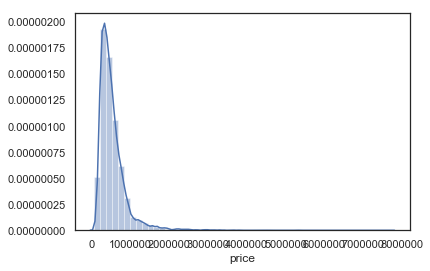

In [61]:
sns.distplot(df.price)

In [62]:
targ_var_log=np.log(targ_var)

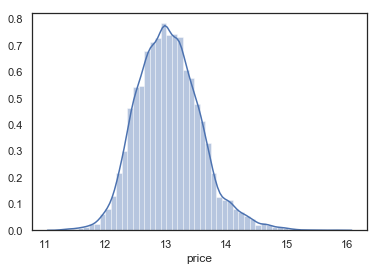

In [63]:
sns.distplot(targ_var_log)

Much better, now let us redo both of our linear regressions. 

Lets also add in train test split functionality which also should boost our r-squared.

In [64]:
X = df_final.drop('date',axis=1)
y = targ_var_log #adding in the log of targ var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #adding in the train/test split

linreg = LinearRegression()
linreg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
linreg.score(X,y)

0.8870668604150778

In [66]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     777.5
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:58:14   Log-Likelihood:                 6759.1
No. Observations:               21597   AIC:                        -1.308e+04
Df Residuals:                   21380   BIC:                        -1.135e+04
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.4511      0.019    280.743      0.000       5.413       5.489
waterfront_0.0             2.5132      0.012    205.586      0.000       2.489       2.537
waterfront_1.0             2.9379      0.015    201.831      0.000       2.909       2.966
condition_1                0.8611      0.028     31.094      0.000       0.807       0.915
condition_2                1.0131      0.013     75.694      0.000       0.987       1.039
condition_3                1.1391      0.008    143.060      0.000       1.123       1.155
condition_4                1.1882      0.008    147.880      0.000       1.172       1.204
condition_5                1.2496      0.009    146.245      0.000       1.233       1.266
view_0.0                   0.9294      0.006    161.181      0.000       0.918       0.941
view_1.0                   1.0681      0.010    110.893      0.000       1.049       1.087
view_2.0                   1.0529      0.007    148.008      0.000       1.039       1.067
view_3.0                   1.1331      0.008    136.286      0.000       1.117       1.149
view_4.0                   1.2676      0.011    118.123      0.000       1.247       1.289
floors_1.0                 0.9512      0.012     80.255      0.000       0.928       0.974
floors_1.5                 0.9289      0.012     76.280      0.000       0.905       0.953
floors_2.0                 0.9164      0.012     79.450      0.000       0.894       0.939
floors_2.5                 0.9273      0.016     56.253      0.000       0.895       0.960
floors_3.0                 0.8448      0.013     64.323      0.000       0.819       0.871
floors_3.5                 0.8825      0.058     15.345      0.000       0.770       0.995
grade_3                    0.6359      0.164      3.867      0.000       0.314       0.958
grade_4                    0.1225      0.037      3.316      0.001       0.050       0.195
grade_5                    0.1017      0.020      4.970      0.000       0.062       0.142
grade_6                    0.1890      0.018     10.562      0.000       0.154       0.224
grade_7                    0.2864      0.018     16.343      0.000       0.252       0.321
grade_8                    0.3829      0.018     21.791      0.000       0.348       0.417
grade_9                    0.4997      0.018     28.029      0.000       0.465       0.535
grade_10                   0.5913      0.018     32.252      0.000       0.555       0.627
grade_11                   0.7053      0.020     35.789      0.000       0.667       0.744
grade_12                   0.8351      0.026     32.615      0.000       0.785       0.885
grade_13                   1.1014      0.054     20.388      0.000       0.996       1.207
bedrooms_1                 0.5340      0.027     19.682      0.000       0.481  

This model still has some features with p-values greater than the standard .05. Therefore, we will remove these manually below.

In [68]:
df_final_pvalue=df_final.drop(['grade_4','grade_5','bedrooms_10','zipcode_98024','zipcode_98028','zipcode_98065','bathrooms_0.5','bathrooms_1.25','bathrooms_5.75','bathrooms_6.75','bathrooms_7.5','bathrooms_7.75','yr_built_new_1900-1910','yr_built_new_1910-1920','yr_built_new_1920-1930','yr_built_new_1930-1940','yr_built_new_2000-2015'],axis=1)

In [69]:
X= df_final_pvalue.drop('date',axis=1)

In [70]:
X_int = sm.add_constant(X) #rerunning our regression using statsmodel
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     827.1
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:58:58   Log-Likelihood:                 6751.4
No. Observations:               21597   AIC:                        -1.309e+04
Df Residuals:                   21393   BIC:                        -1.147e+04
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6413      0.055    102.261      0.000       5.533       5.749
waterfront_0.0             2.6087      0.029     91.456      0.000       2.553       2.665
waterfront_1.0             3.0326      0.030    102.225      0.000       2.974       3.091
condition_1                0.9009      0.030     30.472      0.000       0.843       0.959
condition_2                1.0511      0.017     62.239      0.000       1.018       1.084
condition_3                1.1773      0.013     90.624      0.000       1.152       1.203
condition_4                1.2257      0.013     93.977      0.000       1.200       1.251
condition_5                1.2864      0.013     95.814      0.000       1.260       1.313
view_0.0                   0.9677      0.012     81.929      0.000       0.945       0.991
view_1.0                   1.1065      0.014     78.186      0.000       1.079       1.134
view_2.0                   1.0906      0.012     87.305      0.000       1.066       1.115
view_3.0                   1.1708      0.013     88.065      0.000       1.145       1.197
view_4.0                   1.3057      0.015     87.887      0.000       1.277       1.335
floors_1.0                 0.9822      0.015     67.559      0.000       0.954       1.011
floors_1.5                 0.9597      0.015     65.148      0.000       0.931       0.989
floors_2.0                 0.9484      0.014     66.503      0.000       0.920       0.976
floors_2.5                 0.9585      0.019     51.560      0.000       0.922       0.995
floors_3.0                 0.8783      0.015     56.912      0.000       0.848       0.909
floors_3.5                 0.9143      0.058     15.698      0.000       0.800       1.028
grade_3                    0.5263      0.180      2.926      0.003       0.174       0.879
grade_6                    0.0873      0.012      7.228      0.000       0.064       0.111
grade_7                    0.1863      0.012     15.313      0.000       0.162       0.210
grade_8                    0.2833      0.013     22.237      0.000       0.258       0.308
grade_9                    0.4008      0.014     29.682      0.000       0.374       0.427
grade_10                   0.4928      0.015     33.652      0.000       0.464       0.522
grade_11                   0.6074      0.017     35.662      0.000       0.574       0.641
grade_12                   0.7403      0.025     29.585      0.000       0.691       0.789
grade_13                   1.0209      0.056     18.306      0.000       0.912       1.130
bedrooms_1                 0.2778      0.105      2.636      0.008       0.071       0.484
bedrooms_2                 0.2512      0.104      2.403      0.016       0.046       0.456
bedrooms_3                 0.2402      0.104      2.301      0.021       0.036  

Perfect, now we will take this one step further by validating our model one last time. At the end of the day we want the best features to make our model the most accurate. 

In [71]:
df_final_pvalue_2= df_final_pvalue.drop(['bathrooms_6.5','bathrooms_2.0','bathrooms_1.5','bathrooms_1.0','bathrooms_0.75','bedrooms_33','bedrooms_11','bedrooms_9','bedrooms_8','bedrooms_7','bedrooms_6'],axis=1)
X=df_final_pvalue_2.drop('date',axis=1)

In [72]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     873.8
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:00:08   Log-Likelihood:                 6738.5
No. Observations:               21597   AIC:                        -1.309e+04
Df Residuals:                   21404   BIC:                        -1.155e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.7664      0.014    425.206      0.000       5.740       5.793
waterfront_0.0             2.6707      0.010    270.635      0.000       2.651       2.690
waterfront_1.0             3.0957      0.013    239.914      0.000       3.070       3.121
condition_1                0.9259      0.028     33.616      0.000       0.872       0.980
condition_2                1.0764      0.013     82.386      0.000       1.051       1.102
condition_3                1.2020      0.007    162.186      0.000       1.187       1.216
condition_4                1.2505      0.008    165.850      0.000       1.236       1.265
condition_5                1.3117      0.008    161.786      0.000       1.296       1.328
view_0.0                   0.9929      0.005    200.451      0.000       0.983       1.003
view_1.0                   1.1311      0.009    122.773      0.000       1.113       1.149
view_2.0                   1.1158      0.007    170.464      0.000       1.103       1.129
view_3.0                   1.1966      0.008    152.263      0.000       1.181       1.212
view_4.0                   1.3300      0.010    128.337      0.000       1.310       1.350
floors_1.0                 1.0036      0.011     87.945      0.000       0.981       1.026
floors_1.5                 0.9806      0.012     84.226      0.000       0.958       1.003
floors_2.0                 0.9692      0.011     86.911      0.000       0.947       0.991
floors_2.5                 0.9787      0.016     60.423      0.000       0.947       1.010
floors_3.0                 0.8991      0.013     71.031      0.000       0.874       0.924
floors_3.5                 0.9351      0.057     16.329      0.000       0.823       1.047
grade_3                    0.5405      0.179      3.019      0.003       0.190       0.891
grade_6                    0.0861      0.012      7.187      0.000       0.063       0.110
grade_7                    0.1854      0.012     15.390      0.000       0.162       0.209
grade_8                    0.2826      0.013     22.396      0.000       0.258       0.307
grade_9                    0.4002      0.013     29.840      0.000       0.374       0.427
grade_10                   0.4924      0.015     33.807      0.000       0.464       0.521
grade_11                   0.6070      0.017     35.805      0.000       0.574       0.640
grade_12                   0.7404      0.025     29.772      0.000       0.692       0.789
grade_13                   1.0181      0.055     18.435      0.000       0.910       1.126
bedrooms_1                 0.0907      0.018      5.141      0.000       0.056       0.125
bedrooms_2                 0.0634      0.012      5.426      0.000       0.041       0.086
bedrooms_3                 0.0530      0.011      4.925      0.000       0.032  

Now we want to look at our Mean Squared Error.

In [74]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.030758285017244327
Test Mean Squarred Error: 0.042336659395383835


This is great we see here that our train and test are very similar and both very low!

##### Cross Validation


This will determine how well our model performs against trained data and it will test it for unseen data. 

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [77]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.9588508093953658
-0.2878603206329509
-0.5939385628924095


In [78]:

score = cross_val_score(linreg, X, y, cv=30, scoring="r2")
print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')

# cross_validation(X, y, cv=15, show_scores=False)
# score = cross_val_score(linreg, X, y, cv=15, scoring="r2")


Model Accuracy: 8.0 %


After a repetitive manual process we came up with a final linear regression model using StatsModels built in methods.  The final p-value was .886.  The model is accurate 88 percent of the time.  The top 5 variables that had the largest coefficients are below.  

In [154]:
df_coef=pd.DataFrame(model.params)

In [165]:
coef=df_coef.sort_values(0,ascending=False)

In [168]:
coef[1:6].rename(index=str,columns={0:'Coef.'})

,Coef.
waterfront_1.0,2.554003
yr_renovated_1,2.373348
yr_renovated_0,2.312161
waterfront_0.0,2.131505
sqft_living,1.664111


In the end, we came up with a very accurate model that is affected the most by the square footage of the house and whether the house has been renovated. In addition, we can see that waterfront plays a crucial factor in the price of house. All in all, the OSEMN frameworked worked well. You can clearly see the process steps broken out: Obtaining the data from the csv file, scrubbing the data both numerical and categorical, exploring the data through EDA questions, modeling of the data in both statsmodel and sklearn, and last but not least intepretations of the top five features affecting the data. 